<a href="https://colab.research.google.com/github/zhukov19/DE_Sprint/blob/develop/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
with open("/content/data.json", "r") as file:
  data = json.load(file)

In [3]:
data_list = [] # пустой список для датасета
for i in data["data"]:
  data_list.append([i["title"],i["work experience"],i["salary"],i["region"]])

In [4]:
data["data"][0].keys()

dict_keys(['title', 'work experience', 'salary', 'region'])

In [5]:
# импортируем данные в датафрейм Pandas

hh_data = pd.DataFrame(data_list, columns=data["data"][0].keys())
hh_data.rename(columns = {'work experience' : 'work_experience'}, inplace = True)
hh_data

,title,work_experience,salary,region
0,C++ разработчик (Senior / Middle),3–6 лет,от 4 000 USD на руки,Москва
1,Python Developer (Intranet),1–3 года,з/п не указана,"Москва, Краснопресненская и еще 1"
2,Python Developer (remote),1–3 года,з/п не указана,Москва
3,Middle Python разработчик (Django),1–3 года,от 160 000 до 240 000 руб. до вычета налогов,Краснодар
4,Python-разработчик в R&D отдел,1–3 года,от 100 000 до 150 000 руб. на руки,Санкт-Петербург
...,...,...,...,...
93,Python Developer (Extranet Team),1–3 года,з/п не указана,"Москва, Краснопресненская и еще 1"
94,Senior/Lead Python-разработчик,3–6 лет,з/п не указана,Краснодар
95,Senior Python Developer,более 6 лет,з/п не указана,Санкт-Петербург
96,"Senior системный разработчик (python, Linux)",3–6 лет,з/п не указана,Екатеринбург


In [6]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            98 non-null     object
 1   work_experience  98 non-null     object
 2   salary           98 non-null     object
 3   region           98 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [7]:
# Считаем количество уникальных должностей в датасете

vacancy_count_hh = len(np.unique(hh_data['title']))
print(f'Количество уникальных должностей в датасете: {vacancy_count_hh}')

Количество уникальных должностей в датасете: 68


In [8]:
hh_data['title'].unique()

array(['C++ разработчик (Senior / Middle)', 'Python Developer (Intranet)',
       'Python Developer (remote)', 'Middle Python разработчик (Django)',
       'Python-разработчик в R&D отдел',
       'Программист / Разработчик Python', 'Программист Python (Middle+)',
       'Python Developer', 'Senior VoIP engineer / Python developer',
       'Python developer ( Middle и выше )', 'Middle Python разработчик',
       'Python разработчик (Решения для моделирования)',
       'BackEnd-разработчик (Python)', 'Python Developer / Data Engineer',
       'Python developer', 'Python разработчик', 'Разработчик Python',
       'Python-разработчик систем сбора',
       'Инженер-разработчик Python под Linux',
       'Middle BackEnd-разработчик (Python)',
       'Senior Python developer ML',
       'Middle Python Developer (backend) / DevOps',
       'Backend разработчик', 'Python-разработчик',
       'Аналитик в команду внедрения ботов (со знанием Python)',
       'Senior Python Developer', 'Backend dev

In [9]:
work_experience_count_hh = len(np.unique(hh_data['work_experience']))
print(f'Количество уникальных work_experience в датасете: {work_experience_count_hh}')

Количество уникальных work_experience в датасете: 3


In [10]:
# Выводим список уникальных должностей в датасете

hh_data['work_experience'].unique()

array(['3–6 лет', '1–3 года', 'более 6 лет'], dtype=object)

In [11]:
# Считаем количество уникальных salary в датасете

salary_count_hh = len(np.unique(hh_data['salary']))
print(f'Количество уникальных salary в датасете: {salary_count_hh}')

Количество уникальных salary в датасете: 27


In [12]:
hh_data['salary'].unique()

array(['от 4\xa0000 USD на руки', 'з/п не указана',
       'от 160\xa0000 до 240\xa0000 руб. до вычета налогов',
       'от 100\xa0000 до 150\xa0000 руб. на руки',
       'от 250\xa0000 до 300\xa0000 руб. на руки',
       'от 200\xa0000 руб. на руки',
       'от 190\xa0000 до 235\xa0000 руб. на руки',
       'от 50\xa0000 руб. до вычета налогов',
       'от 55\xa0000 до 200\xa0000 руб. на руки',
       'от 140\xa0000 до 250\xa0000 руб. на руки',
       'до 150\xa0000 руб. на руки', 'до 250\xa0000 руб. на руки',
       'от 100\xa0000 до 250\xa0000 руб. на руки',
       'от 150\xa0000 до 200\xa0000 руб. на руки',
       'от 180\xa0000 руб. на руки', 'до 300\xa0000 руб. на руки',
       'от 240\xa0000 руб. до вычета налогов',
       'до 350\xa0000 руб. на руки',
       'от 100\xa0000 до 400\xa0000 руб. до вычета налогов',
       'от 250\xa0000 руб. на руки',
       'от 80\xa0000 до 120\xa0000 руб. на руки',
       'от 200\xa0000 до 250\xa0000 руб. на руки',
       'от 130\xa0000 руб. на р

In [13]:
region_count_hh = len(np.unique(hh_data['region']))
print(f'Количество уникальных region в датасете: {region_count_hh}')

Количество уникальных region в датасете: 41


In [14]:
# Выводим список уникальных region в датасете

hh_data['region'].unique()

array(['Москва', 'Москва, Краснопресненская и еще\xa01\xa0', 'Краснодар',
       'Санкт-Петербург', 'Белгород',
       'Москва, Каланчёвская и еще\xa02\xa0',
       'Санкт-Петербург, Московские ворота',
       'Москва, Менделеевская и еще\xa01\xa0', 'Симферополь',
       'Санкт-Петербург, Московская', 'Екатеринбург, Площадь 1905 года',
       'Москва, Динамо и еще\xa01\xa0', 'Йошкар-Ола', 'Казань',
       'Москва, Белорусская и еще\xa01\xa0',
       'Москва, Савёловская и еще\xa02\xa0', 'Новосибирск',
       'Москва, Кутузовская и еще\xa03\xa0',
       'Екатеринбург, Геологическая и еще\xa01\xa0',
       'Москва, Савёловская', 'Рязань', 'Архангельск', 'Омск',
       'Москва, Трубная и еще\xa02\xa0',
       'Санкт-Петербург, Старая Деревня', 'Москва, Арбатская',
       'Екатеринбург', 'Уфа', 'Санкт-Петербург, Площадь Мужества',
       'Нижний Новгород', 'Москва, Деловой центр',
       'Москва, Курская и еще\xa02\xa0',
       'Екатеринбург, Динамо и еще\xa01\xa0', 'Саратов', 'Владимир',


In [16]:
# импортируем данные в датафрейм Pandas

ds_salaries = pd.read_csv('/content/ds_salaries.csv', index_col='Unnamed: 0')
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
# Изучим общую информацию о датасете

ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


пропуски в данных отсутствуют


In [18]:
# Считаем количество уникальных должностей в датасете

vacancy_count = len(np.unique(ds_salaries['job_title']))
print(f'Количество уникальных должностей в датасете: {vacancy_count}')

Количество уникальных должностей в датасете: 50


In [19]:
# 1. Формируем список уникальных значений наименований вакансий c количеством записей по каждой вакансии

ds_salaries['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Выводы:

Количество уникальных должностей в датасете: 50
Наиболее часто встречающиеся вакансии:
Должность	Кол-во вакансий
Data Scientist	143
Data Engineer	132
Data Analyst	97
Machine Learning Engineer	41
Research Scientist	16
Data Science Manager	12


In [20]:
# Создадим функцию, которая на основе данных из столбца `job_title`
# сформирует новый столбец `job_category`в которые войдут определенные
# нами категории.

def categorize_job(list):
  if "AI" in list:
    return "AI"
  elif "Big Data" in list:
    return "BD"
  elif "Analy" in list:
    return "DA"
  elif "Research Scientist" in list:
    return "DA"
  elif "Data Engin" in list:
    return "DE"
  elif "ETL" in list:
    return "DE"
  elif "Data Architect" in list:
    return "DE"
  elif "Computer Vision" in list:
    return "DL"
  elif "NLP" in list:
    return "DL"    
  elif "Data Scien" in list:
    return "DS"
  elif "Head of Data" in list:
    return "DS"
  elif "Data Specialist" in list:
    return "DS"
  elif "Machine Learning" or "ML" in list:
    return "ML" 
  else:
    return "Other"

In [21]:
# Категоризуем датасет по направлениям вакансий

ds_salaries['job_category'] = ds_salaries['job_title'].apply(categorize_job)

In [22]:
# Проверяем категоризацию, выводя на экран списки вакансий, попавших в каждую
# категорию и сверяя с сформированной нами таблицей категорий вакансий

ds_salaries.loc[ds_salaries['job_category'] == 'AI']['job_title'].value_counts()

AI Scientist    7
Name: job_title, dtype: int64

In [23]:
ds_salaries.loc[ds_salaries['job_category'] == 'BD']['job_title'].value_counts()

Big Data Engineer     8
Big Data Architect    1
Name: job_title, dtype: int64

In [24]:
ds_salaries.loc[ds_salaries['job_category'] == 'DA']['job_title'].value_counts()

Data Analyst               97
Research Scientist         16
Data Analytics Manager      7
BI Data Analyst             6
Business Data Analyst       5
Data Analytics Engineer     4
Analytics Engineer          4
Lead Data Analyst           3
Product Data Analyst        2
Financial Data Analyst      2
Principal Data Analyst      2
Marketing Data Analyst      1
Finance Data Analyst        1
Data Analytics Lead         1
Name: job_title, dtype: int64

In [25]:
ds_salaries.loc[ds_salaries['job_category'] == 'DE']['job_title'].value_counts()

Data Engineer                   132
Data Architect                   11
Lead Data Engineer                6
Data Engineering Manager          5
Principal Data Engineer           3
Cloud Data Engineer               2
Director of Data Engineering      2
ETL Developer                     2
Name: job_title, dtype: int64

In [26]:
ds_salaries.loc[ds_salaries['job_category'] == 'ML']['job_title'].value_counts()

Machine Learning Engineer                   41
Machine Learning Scientist                   8
ML Engineer                                  6
Applied Machine Learning Scientist           4
Machine Learning Infrastructure Engineer     3
Machine Learning Developer                   3
Machine Learning Manager                     1
Head of Machine Learning                     1
Lead Machine Learning Engineer               1
Name: job_title, dtype: int64

Вывод: категоризация вакансий по направлениям произведена корректно

Средняя и медианная зарплата по группам ваканий
Задача: определить среднюю и медианную зарплату по группам вакансий



In [27]:
# Создадим сводную таблицу по категориям вакансий и применим агрегирующие
# функции к столбцам `salary` и `salary_in_usd`. Результат округлим до 2 знаков

np.round(pd.pivot_table(ds_salaries, index=['job_category'], values=['salary', 'salary_in_usd'], aggfunc=[np.mean, np.median]), 2)

mean                median              
                 salary salary_in_usd  salary salary_in_usd
job_category                                               
AI            290571.43      66135.57  120000       45896.0
BD            418333.33      57277.22  100000       60000.0
DA            196422.46      99929.10   99000       93000.0
DE            176079.17     122383.31  115000      112872.0
DL            131090.91      56809.73  102000       37236.0
DS            480622.26     120393.46  132500      117351.5
ML            527987.25     113026.13  120000       87932.0

Вывод: исходя из средних зарплат в пересчете в USD, самая высокооплачиваемая группа вакансий это — DE (инженер данных)

Средняя и медианная зарплата по регионам
Задача: определить среднюю и медианную зарплату для каждого региона

В исходных данных определены по отдельности регион нахождения компании (столбец company_location) и регион места жительства сотрудников (столбец employee_residence). Определим средние и медианные зарплаты в местной валюте (столбец salary) и в пересчете в USD (столбец salary_in_usd) для обоих наборов данных

In [29]:
# Создадим сводную таблицу по регионам компаний (столбец `company_location`)
# и применим агрегирующие # функции к столбцам `salary` и `salary_in_usd`.
# Результат округлим до 2 знаков

np.round(pd.pivot_table(ds_salaries, index=['company_location'], values=['salary', 'salary_in_usd'], aggfunc=[np.mean, np.median]), 2)

mean                    median              
                       salary salary_in_usd      salary salary_in_usd
company_location                                                     
AE                  100000.00     100000.00    115000.0      115000.0
AS                 1335000.00      18053.00   1335000.0       18053.0
AT                   64000.00      72920.75     62000.0       69489.5
AU                  130333.33     108042.67    121000.0       87425.0
BE                   72500.00      85699.00     72500.0       85699.0
BR                   65200.00      18602.67     69600.0       18907.0
CA                  115306.67      99823.73     97500.0       81895.5
CH                  275000.00      64114.00    275000.0       64114.0
CL                30400000.00      40038.00  30400000.0       40038.0
CN                  199500.00      71665.50    199500.0       71665.5
CO                   21844.00      21844.00     21844.0       21844.0
CZ                   49499.50      50937.00     49499.5       50937.0
DE                   71289.96      81887.21     66000.0       78015.0
DK                  185000.00      54386.33    180000.0       45896.0
DZ                  100000.00     100000.00    100000.0      100000.0
EE                   30000.00      32974.00     30000.0       32974.0
ES                   47382.86      53060.14     42500.0       48371.5
FR                   56881.33      63970.67     48000.0       56738.0
GB                   62294.81      81583.04     60000.0       78526.0
GR                   47363.64      52293.09     45000.0       49461.0
HN                   20000.00      20000.00     20000.0       20000.0
HR                   40000.00      45618.00     40000.0       45618.0
HU                11000000.00      35735.00  11000000.0       35735.0
IE                   65000.00      71444.00     65000.0       71444.0
IL                  160000.00     119059.00    160000.0      119059.0
IN                 2065208.21      28581.75   1636000.0       22124.0
IQ                  100000.00     100000.00    100000.0      100000.0
IR                    4000.00       4000.00      4000.0        4000.0
IT                   31100.00      36366.50     31100.0       36366.5
JP                 3408666.67     114127.33   2355000.0       75682.0
KE                    9272.00       9272.00      9272.0        9272.0
LU                   38333.33      43942.67     50000.0       59102.0
MD                   18000.00      18000.00     18000.0       18000.0
MT                   24000.00      28369.00     24000.0       28369.0
MX                  279333.33      32123.33     60000.0       33511.0
MY                   40000.00      40000.00     40000.0       40000.0
NG                   30000.00      30000.00     30000.0       30000.0
NL                   49100.00      54945.75     49500.0       54021.0
NZ                  125000.00     125000.00    125000.0      125000.0
PK                   13333.33      13333.33     12000.0       12000.0
PL                  142500.00      66082.50    140000.0       41093.5
PT                   42100.00      47793.75     47700.0       54217.5
RO                   60000.00      60000.00     60000.0       60000.0
RU                  157500.00     157500.00    157500.0      157500.0
SG                  120000.00      89294.00    120000.0       89294.0
SI                   54000.00      63831.00     54000.0       63831.0
TR                  179333.33      20096.67    180000.0       20171.0
UA                   13400.00      13400.00     13400.0       13400.0
US                  187715.97     144055.26    136620.0      135000.0
VN                    4000.00       4000.00      4000.0        4000.0

Доля каждого региона в общем количестве вакансий
Задача: Определить процентное соотношение каждого региона по вакансиям от всех вакансий.

In [30]:
# Создадим сводную таблицу по регионам расположения компаний
# c количеством вакансий для каждого региона
region_share = pd.pivot_table(ds_salaries, index=['company_location'], values=['salary'], aggfunc=['count'])

# Преобразуем строку заголовков сводной таблицы
region_share.columns = ['_'.join(str(s).strip() for s in col if s) for col in region_share.columns]
#region_share.reset_index(inplace=True)

# Добавим к сводной таблице столбец с долей региона по количеству вакансий
region_share['% of Total'] = round((region_share.count_salary / region_share.count_salary.sum() * 100), 2)

# Отсортируем полученную сводную таблицу по убыванию долей регионов
region_share.sort_values(by='% of Total', ascending=False)

,count_salary,% of Total
company_location,,
US,355,58.48
GB,47,7.74
CA,30,4.94
DE,28,4.61
IN,24,3.95
FR,15,2.47
ES,14,2.31
GR,11,1.81
JP,6,0.99


 Большинство вакансий (58,48%) приходится нв США. На втором месте (7,74%) — Великобритания. На третьем — Канада (4,94%)

Корреляция уровня опыта от зарплаты
Задача: найти корреляцию уровня опыта от зарплаты.

В связи с тем, что нам необходимо установить корреляцию между категориальной (experience_level) и количественной переменной (experience_level) будем применять однофакторный дисперсионный анализ (ANOVA), который используется для определения того, существует ли статистически значимое различие между средними значениями трех или более независимых групп.

In [31]:
# Создадим новый датафрейм из исходного включив в него
# только столбцы `experience_level` и `salary_in_usd`

ds_salaries_2 = pd.DataFrame(ds_salaries, columns = ['experience_level', 'salary_in_usd'])
ds_salaries_2.head()

,experience_level,salary_in_usd
0,MI,79833
1,SE,260000
2,SE,109024
3,MI,20000
4,SE,150000


In [32]:
# Сгруппируем датасет по уровню опыта и рассчитаем описательные статистики

ds_salaries_2.groupby(by='experience_level').describe()

salary_in_usd                                         \
                         count           mean            std      min   
experience_level                                                        
EN                        88.0   61643.318182   44395.541126   4000.0   
EX                        26.0  199392.038462  117071.255697  69741.0   
MI                       213.0   87996.056338   63901.057478   2859.0   
SE                       280.0  138617.292857   57691.978337  18907.0   

                                                           
                       25%       50%        75%       max  
experience_level                                           
EN                 27505.0   56500.0   85425.75  250000.0  
EX                130006.5  171437.5  233750.00  600000.0  
MI                 48000.0   76940.0  112000.00  450000.0  
SE                100000.0  135500.0  170000.00  412000.0

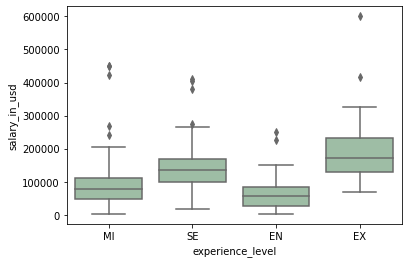

In [33]:
# Проверка нормальности распределения зарплат внутри групп
# уровня опыта.

ax = sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries_2, color='#99c2a2')
#ax = sns.swarmplot(x='experience_level', y='salary_in_usd', data=ds_salaries_2, color='#7d0013')
plt.show()

Формулировка статистической гипотезы:

H0 — нет статистически значимой разницы уровня средней зарплаты в USD среди групп с различным опытом работы
H1 — есть статистически значимая разница уровня средней зарплаты в USD по меньшей мере среди 2 групп с различным опытом работы

In [35]:

fvalue, pvalue = stats.f_oneway(en_level['salary_in_usd'], ex_level['salary_in_usd'], mi_level['salary_in_usd'], se_level['salary_in_usd'])
print(fvalue, pvalue)

64.67551541055848 2.8818473464173216e-36


Вывод: поскольку значение p-value в тесте ANOVA (2.8818473464173216e-36) меньше 0,05, у нас есть достаточно доказательств, чтобы отклонить нулевую гипотезу. Это означает, что средняя зарплата статистически значимо различается в группах по уровню опыта.